In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('D_winter.csv',encoding = "cp1252")

In [3]:
print(df.head())
print(df.columns)

         Date  Time   SO2     NO    NO2    NOX    CO    O3   PM25    PM10  \
0  2016-10-16     1  1.49  22.58  17.32  39.90  2.20  1.14  56.16   97.89   
1  2016-10-16     2  1.77   8.81  13.99  22.80  2.21  1.13  60.85  105.78   
2  2016-10-16     3  1.68   0.30  10.02  10.32  2.21  1.21  56.25   88.50   
3  2016-10-16     4  1.81    NaN   5.52   2.35  2.21  1.24  62.65   85.06   
4  2016-10-16     5  1.45    NaN   8.25   5.25  2.21  1.24  51.40   75.21   

   Temperature     RH  Solar Rad       BP  Rain  Year  Month  Day Week_Day  
0        27.17  80.49       8.38  1008.68   NaN  2016     10   16   Sunday  
1        26.88  82.50       8.13  1008.36   NaN  2016     10   16   Sunday  
2        26.58  83.84       8.18  1008.24   NaN  2016     10   16   Sunday  
3        26.28  85.42       8.13  1008.26   NaN  2016     10   16   Sunday  
4        26.00  86.59       8.28  1008.34   NaN  2016     10   16   Sunday  
Index(['Date', 'Time', 'SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM25', 'PM10

In [4]:
df.dtypes

Date            object
Time             int64
SO2            float64
NO             float64
NO2            float64
NOX            float64
CO             float64
O3             float64
PM25           float64
PM10           float64
Temperature    float64
RH             float64
Solar Rad      float64
BP             float64
Rain           float64
Year             int64
Month            int64
Day              int64
Week_Day        object
dtype: object

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [6]:
df.shape

(9288, 19)

In [7]:
from datetime import datetime
#df['Date']=pd.to_datetime(df['Date'])
time=pd.to_datetime(df['Date'])

In [8]:
tf=pd.DataFrame()

In [9]:
tf['DateTime']=time
df['Year']=tf.DateTime.dt.year
df['Month']=tf.DateTime.dt.month
df['Day']=tf.DateTime.dt.day
df['Week_Day']=tf.DateTime.dt.weekday_name

In [10]:
df.head()

,Date,Time,SO2,NO,NO2,NOX,CO,O3,PM25,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day,Week_Day
0,2016-10-16,1,1.49,22.58,17.32,39.90,2.20,1.14,56.16,97.89,27.17,80.49,8.38,1008.68,NaN,2016,10,16,Sunday
1,2016-10-16,2,1.77,8.81,13.99,22.80,2.21,1.13,60.85,105.78,26.88,82.50,8.13,1008.36,NaN,2016,10,16,Sunday
2,2016-10-16,3,1.68,0.30,10.02,10.32,2.21,1.21,56.25,88.50,26.58,83.84,8.18,1008.24,NaN,2016,10,16,Sunday
3,2016-10-16,4,1.81,NaN,5.52,2.35,2.21,1.24,62.65,85.06,26.28,85.42,8.13,1008.26,NaN,2016,10,16,Sunday
4,2016-10-16,5,1.45,NaN,8.25,5.25,2.21,1.24,51.40,75.21,26.00,86.59,8.28,1008.34,NaN,2016,10,16,Sunday


In [11]:
df.dtypes

Date            object
Time             int64
SO2            float64
NO             float64
NO2            float64
NOX            float64
CO             float64
O3             float64
PM25           float64
PM10           float64
Temperature    float64
RH             float64
Solar Rad      float64
BP             float64
Rain           float64
Year             int64
Month            int64
Day              int64
Week_Day        object
dtype: object

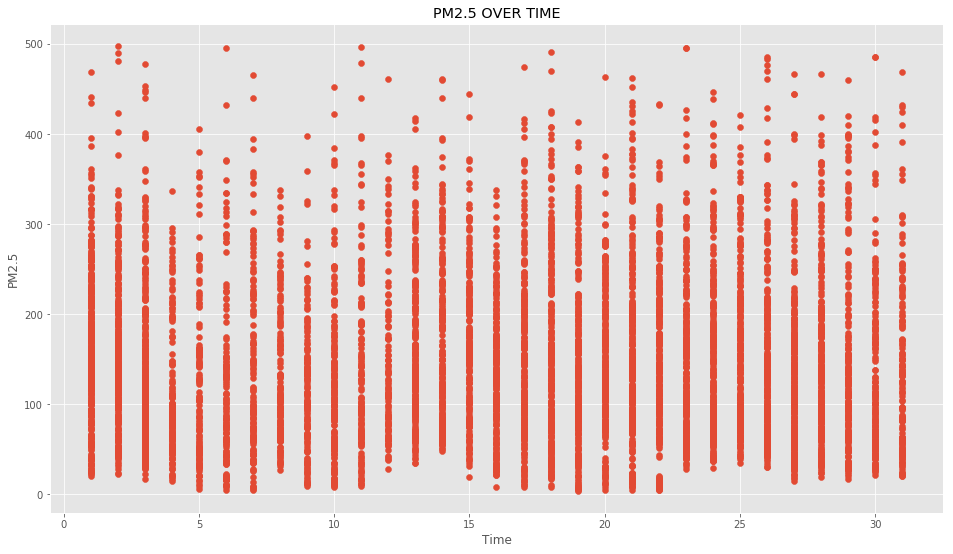

In [12]:
x=df['Day']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER TIME")
plt.show()

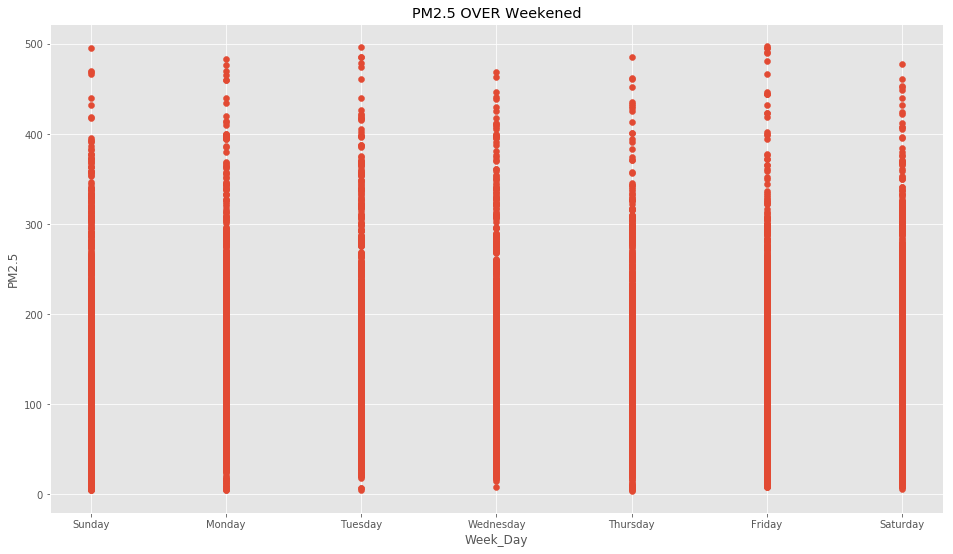

In [13]:
x=df['Week_Day']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Week_Day")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER Weekened")
plt.show()

In [14]:
df.isnull().values.any()

True

In [15]:
df.isnull().sum()

Date              0
Time              0
SO2            1919
NO             4434
NO2            2708
NOX            2831
CO             5141
O3             3515
PM25           1821
PM10           1479
Temperature     180
RH              179
Solar Rad      1843
BP             2317
Rain           4404
Year              0
Month             0
Day               0
Week_Day          0
dtype: int64

In [16]:
df.isnull().sum().sum()

32771

Data Import and Checking Part End.Now Time to Resolve observed Misisng Data

At First I,notice from Last Column, So "Rain", we know that rain always won't happen, so replace all NaN value with Zero , that will be more convenient construction

In [17]:
df["Rain"]=df["Rain"].replace(np.NaN,0)


Check whether all NaN replaced or not.

In [18]:
df["Time"]=df["Time"].replace(0,24)

In [19]:
df.isnull().sum()  #Done

Date              0
Time              0
SO2            1919
NO             4434
NO2            2708
NOX            2831
CO             5141
O3             3515
PM25           1821
PM10           1479
Temperature     180
RH              179
Solar Rad      1843
BP             2317
Rain              0
Year              0
Month             0
Day               0
Week_Day          0
dtype: int64

Now It's Time to Reconstruct BP,Solar Rad,Tempature,PN10,PM2.5,O3,CO,NOX,NO2,NO,SO2 with a innovative and rebust technique called INTERPOLATE. with the help of Interpolate we can calculate missing value between two value using Forward method,BackWard Method or Both.It has also couple of parameter to use,but I just use one.

In [20]:
df["SO2"]=df["SO2"].interpolate(direction_area='outside',limit_direction='both')
df["NO"]=df["NO"].interpolate(direction_area='outside',limit_direction='both')
df["NO2"]=df["NO2"].interpolate(direction_area='outside',limit_direction='both')
df["NOX"]=df["NOX"].interpolate(direction_area='outside',limit_direction='both')
df["CO"]=df["CO"].interpolate(direction_area='outside',limit_direction='both')
df["O3"]=df["O3"].interpolate(direction_area='outside',limit_direction='both')
df["PM25"]=df["PM25"].interpolate(direction_area='outside',limit_direction='both')
df["PM10"]=df["PM10"].interpolate(direction_area='outside',limit_direction='both')
df["Temperature"]=df["Temperature"].interpolate(direction_area='outside',limit_direction='both')
df["RH"]=df["RH"].interpolate(direction_area='outside',limit_direction='both')
df["Solar Rad"]=df["Solar Rad"].interpolate(direction_area='outside',limit_direction='both')
df["BP"]=df["BP"].interpolate(direction_area='outside',limit_direction='both')





In [21]:
df.isnull().sum()

Date           0
Time           0
SO2            0
NO             0
NO2            0
NOX            0
CO             0
O3             0
PM25           0
PM10           0
Temperature    0
RH             0
Solar Rad      0
BP             0
Rain           0
Year           0
Month          0
Day            0
Week_Day       0
dtype: int64

In [22]:
df=df.drop(columns=['NO', 'CO','O3','NOX']) #Raw Darussalam,D_summer,D_winter
#df=df.drop(columns=['Solar Rad']) #only for BARC,B_winter
#df=df.drop(columns=['Solar Rad','BP']) #only for B_summer


In [23]:
#df.isnull().sum().sum()
df.isnull().sum()


Date           0
Time           0
SO2            0
NO2            0
PM25           0
PM10           0
Temperature    0
RH             0
Solar Rad      0
BP             0
Rain           0
Year           0
Month          0
Day            0
Week_Day       0
dtype: int64

In [24]:
df = df.dropna(how='any',axis=0) #drop null value after that

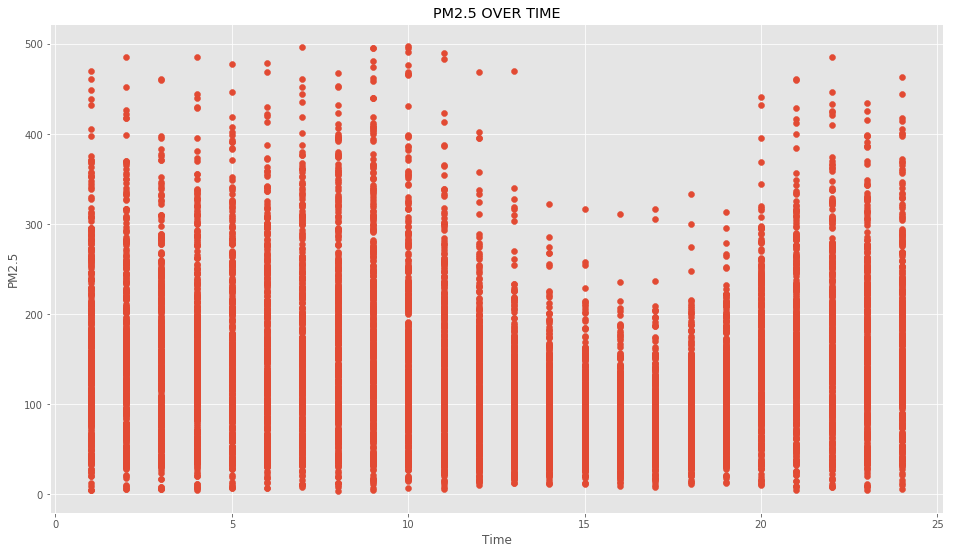

In [25]:
x=df['Time']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER TIME")
plt.show()

In [26]:
#df.isnull().sum().sum()
df.isnull().sum()

Date           0
Time           0
SO2            0
NO2            0
PM25           0
PM10           0
Temperature    0
RH             0
Solar Rad      0
BP             0
Rain           0
Year           0
Month          0
Day            0
Week_Day       0
dtype: int64

In [27]:
df.shape

(9288, 15)

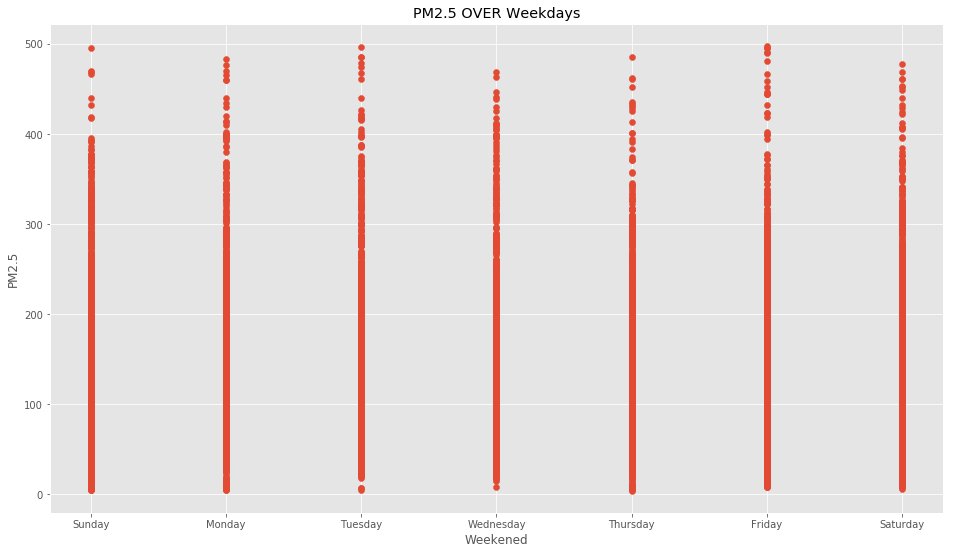

In [28]:
x=df['Week_Day']
y=df['PM25']
plt.scatter(x,y)
plt.xlabel("Weekened")
plt.ylabel("PM2.5")
plt.title("PM2.5 OVER Weekdays")
plt.show()

In [29]:
def t_series(start,end):
    time_series=df[['Date','PM25']][(df['Date'] >= start) & (df['Date'] <= end)]
    x=time_series.Date
    y=time_series.PM25
    plt.plot(x,y)
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Values')
    plt.title('PM2.5 Time Series')
    return plt.show();


In [30]:
#t_series('2016','2019')

In [31]:
#t_series('1/3/2019','31/3/2019')

In [32]:
df.describe()

,Time,SO2,NO2,PM25,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day
count,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000,9288.000000
mean,12.500000,16.380221,20.472468,141.190589,239.117335,23.248640,62.387964,324.158622,1012.815320,1.781228,2017.423773,7.648579,16.728682
std,6.922559,14.229849,16.079358,86.726739,152.834212,4.336017,16.710246,371.950935,2.920136,3.555886,0.965209,4.732411,8.968199
min,1.000000,0.070000,0.050000,4.010000,9.060000,9.450000,20.640000,6.460000,996.420000,0.000000,2016.000000,1.000000,1.000000
25%,6.750000,6.790000,9.150000,75.300000,140.302500,20.330000,48.300000,8.170000,1011.000000,0.000000,2017.000000,2.000000,10.000000
50%,12.500000,13.455000,16.695000,125.120000,202.125000,22.785000,59.780000,111.720000,1013.350000,0.020000,2017.000000,11.000000,18.000000
75%,18.250000,22.413388,28.520000,187.672500,294.082500,26.222500,77.290000,639.574133,1015.000000,0.180000,2018.000000,12.000000,24.000000
max,24.000000,177.580000,226.170000,497.820000,947.000000,36.040000,97.090000,1000.900000,1020.810000,16.000000,2019.000000,12.000000,31.000000


Seems all data range, min,max value etc are quite acceptable. They are all in Range

Now See the Corelation Between Dataset Columns

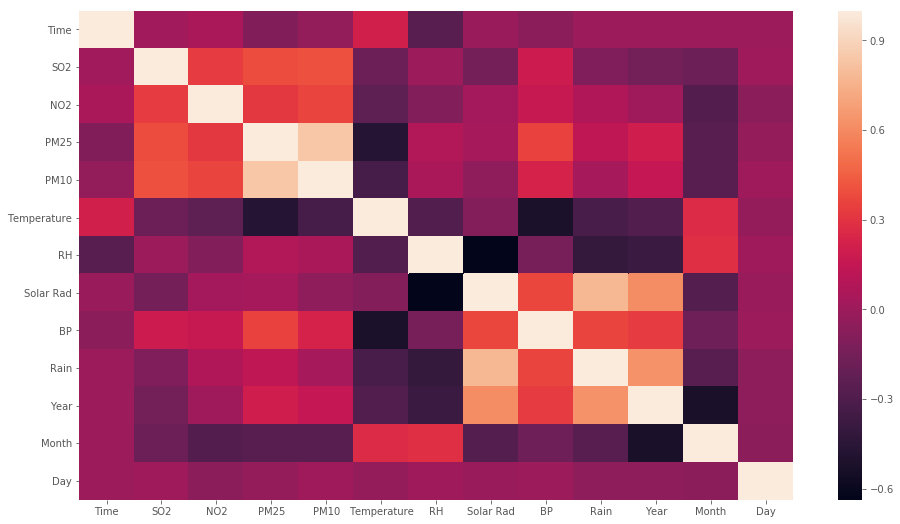

In [33]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [34]:
df['day_week_cat'] = df.Week_Day.astype("category").cat.codes #Catagory week_day like encoding

In [35]:
df = df.drop(['Week_Day'], axis=1) #after that no need of Week_day

In [36]:
df.head()

,Date,Time,SO2,NO2,PM25,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day,day_week_cat
0,2016-10-16,1,1.49,17.32,56.16,97.89,27.17,80.49,8.38,1008.68,0.0,2016,10,16,3
1,2016-10-16,2,1.77,13.99,60.85,105.78,26.88,82.50,8.13,1008.36,0.0,2016,10,16,3
2,2016-10-16,3,1.68,10.02,56.25,88.50,26.58,83.84,8.18,1008.24,0.0,2016,10,16,3
3,2016-10-16,4,1.81,5.52,62.65,85.06,26.28,85.42,8.13,1008.26,0.0,2016,10,16,3
4,2016-10-16,5,1.45,8.25,51.40,75.21,26.00,86.59,8.28,1008.34,0.0,2016,10,16,3


In [37]:
df.dtypes

Date             object
Time              int64
SO2             float64
NO2             float64
PM25            float64
PM10            float64
Temperature     float64
RH              float64
Solar Rad       float64
BP              float64
Rain            float64
Year              int64
Month             int64
Day               int64
day_week_cat       int8
dtype: object

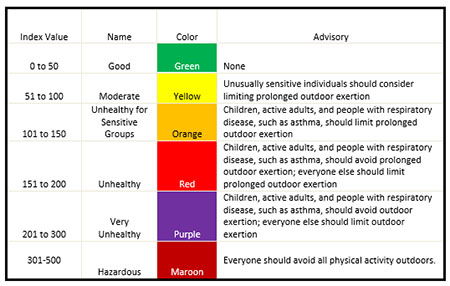

In [38]:
from IPython.display import Image
Image(filename='pic.jpg')

In [39]:
df['Value_cat'] = pd.cut(df.loc[:,'PM25'],[-50,12.0,35.4,55.4,150.4,250.4,1000],labels=[1,2,3,4,5,6])

In [40]:
df = df.drop(['Date', 'PM25'], axis=1)

In [41]:
df.head()

,Time,SO2,NO2,PM10,Temperature,RH,Solar Rad,BP,Rain,Year,Month,Day,day_week_cat,Value_cat
0,1,1.49,17.32,97.89,27.17,80.49,8.38,1008.68,0.0,2016,10,16,3,4
1,2,1.77,13.99,105.78,26.88,82.50,8.13,1008.36,0.0,2016,10,16,3,4
2,3,1.68,10.02,88.50,26.58,83.84,8.18,1008.24,0.0,2016,10,16,3,4
3,4,1.81,5.52,85.06,26.28,85.42,8.13,1008.26,0.0,2016,10,16,3,4
4,5,1.45,8.25,75.21,26.00,86.59,8.28,1008.34,0.0,2016,10,16,3,3


In [42]:
#df['hr_sin'] = np.sin(df.Time*(2.*np.pi/24))
#df['hr_cos'] = np.cos(df.Time*(2.*np.pi/24))
#df['month_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
#df['month_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

In [43]:
#df.plot.scatter('hr_sin','hr_cos').set_aspect('equal')
#df.plot.scatter('month_sin','month_cos').set_aspect('equal')
#plt.show()

In [44]:
#df = df.drop(['Month', 'Time'], axis=1)

Split into Training and Test Data¶

Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

In [45]:
y = df['Value_cat']

In [46]:
X = df.drop(['Value_cat'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1234)

In [48]:
X_train.shape, y_train.shape

((8359, 13), (8359,))

In [49]:
X_test.shape, y_test.shape

((929, 13), (929,))

                                   Multiclass logistic regression




In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# Create logistic regression object
log_regr = LogisticRegression()

In [51]:
# Train the model using the training sets
log_regr.fit(X_train, y_train)

/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
# Score the model
logistic_regression_score = log_regr.score(X_test, y_test)
logistic_regression_score

0.6318622174381054

In [53]:
# Make predictions using the testing set
log_regr_pred = log_regr.predict(X_test)

In [54]:
log_regr_prob = log_regr.predict_proba(X_test)

In [55]:
confusion_log_regr = confusion_matrix(y_test, log_regr_pred)

In [56]:
confusion_log_regr

array([[  0,   2,   0,   0,   0,   0],
       [  0,   7,   1,  27,   0,   0],
       [  0,   0,   1,  81,   0,   0],
       [  0,   0,   0, 392,  27,   4],
       [  0,   0,   0, 140, 114,  19],
       [  0,   0,   0,  13,  28,  73]])

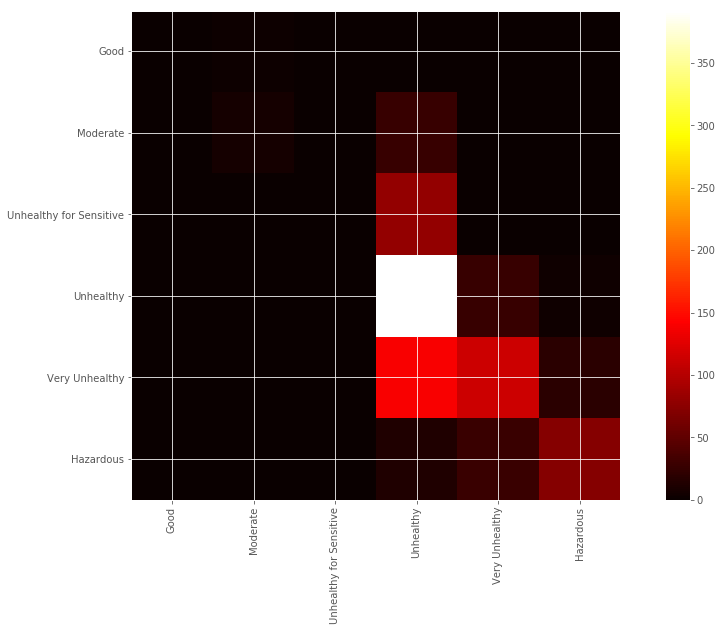

In [57]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_log_regr,cmap=plt.get_cmap('hot'), interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest Regressor object
rf = RandomForestClassifier()

In [59]:
# Train the model using the training sets
rf.fit(X_train, y_train)

/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
# Score the model
rf_score = rf.score(X_test, y_test)
rf_score

0.8223896663078579

In [61]:
# Make predictions using the testing set
rf_pred = rf.predict(X_test)

In [62]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_pred)

In [63]:
confusion_rf

array([[  0,   2,   0,   0,   0,   0],
       [  1,  29,   5,   0,   0,   0],
       [  0,  16,  51,  15,   0,   0],
       [  0,   0,   9, 390,  24,   0],
       [  0,   0,   0,  41, 213,  19],
       [  1,   0,   0,   3,  29,  81]])

In [64]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.62      0.83      0.71        35
           3       0.78      0.62      0.69        82
           4       0.87      0.92      0.89       423
           5       0.80      0.78      0.79       273
           6       0.81      0.71      0.76       114

   micro avg       0.82      0.82      0.82       929
   macro avg       0.65      0.64      0.64       929
weighted avg       0.82      0.82      0.82       929



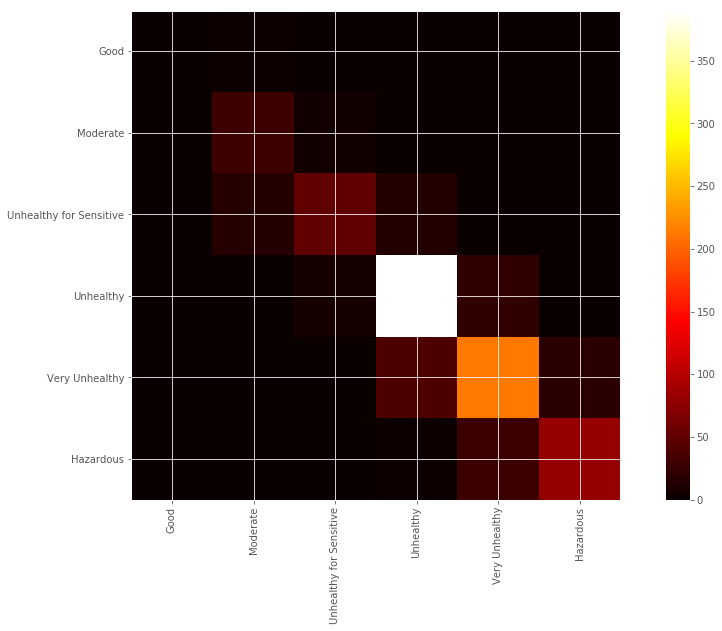

In [65]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_rf, cmap=plt.get_cmap('hot'), interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [66]:
print("Classification models:")
print("Logistic regression score: ", logistic_regression_score)
print("Random forest score: ", rf_score)


Classification models:
Logistic regression score:  0.6318622174381054
Random forest score:  0.8223896663078579


In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Create decision tree object with adaboost

tree = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=300, learning_rate=.1)

In [69]:
# Train the model using the training sets
tree.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=300, random_state=None)

In [70]:
# Score the decision tree model
tree_score = tree.score(X_test, y_test)
tree_score

0.7782561894510226

In [71]:
# Make predictions using the testing set
tree_pred = tree.predict(X_test)

In [72]:
# Calculate confusion matrix
confusion_tree = confusion_matrix(y_test, tree_pred)

In [73]:
confusion_tree

array([[  1,   1,   0,   0,   0,   0],
       [  1,  28,   6,   0,   0,   0],
       [  0,  15,  49,  18,   0,   0],
       [  1,   2,  23, 356,  41,   0],
       [  0,   0,   0,  42, 204,  27],
       [  2,   0,   1,   4,  22,  85]])

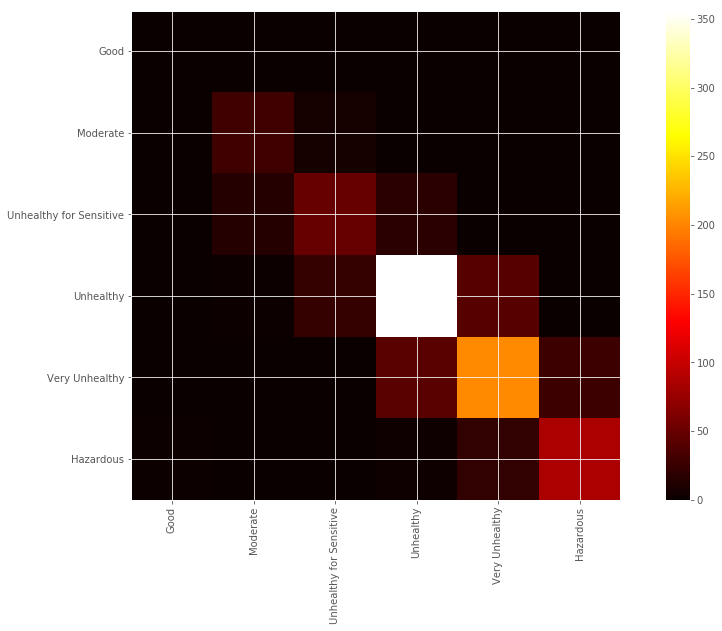

In [74]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_tree, cmap=plt.get_cmap('hot'), interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=1234)

In [76]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
# Score the model
multiclass_neural_network_score = mlp.score(X_test, y_test)
multiclass_neural_network_score

0.7664155005382132

In [78]:
# Make predictions using the testing set
mnn_pred = mlp.predict(X_test)

In [79]:
# Calculate confusion matrix
confusion_mnn = confusion_matrix(y_test,mnn_pred)

In [80]:
confusion_mnn

array([[  0,   2,   0,   0,   0,   0],
       [  0,  25,  10,   0,   0,   0],
       [  0,  11,  41,  30,   0,   0],
       [  0,   4,  19, 346,  49,   5],
       [  0,   0,   0,  31, 226,  16],
       [  0,   0,   0,   7,  33,  74]])

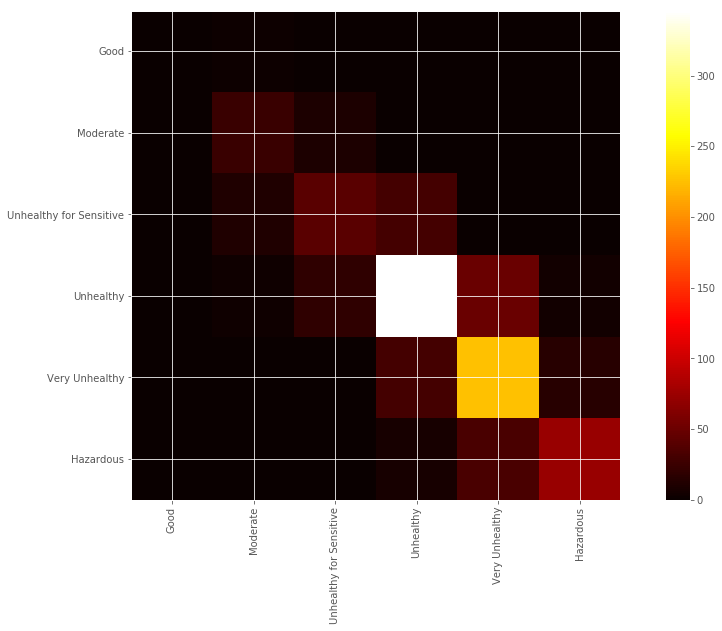

In [81]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_mnn, cmap=plt.get_cmap('hot'), interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [82]:
print(classification_report(y_test, mnn_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.60      0.71      0.65        35
           3       0.59      0.50      0.54        82
           4       0.84      0.82      0.83       423
           5       0.73      0.83      0.78       273
           6       0.78      0.65      0.71       114

   micro avg       0.77      0.77      0.77       929
   macro avg       0.59      0.58      0.58       929
weighted avg       0.77      0.77      0.76       929



/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shaonsani/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
print("Classification models:")
print("Multiclass neural network score: ", multiclass_neural_network_score)
print("Logistic regression score: ", logistic_regression_score)
print("Random forest score: ", rf_score)
print("Decision tree score: ", tree_score)

Classification models:
Multiclass neural network score:  0.7664155005382132
Logistic regression score:  0.6318622174381054
Random forest score:  0.8223896663078579
Decision tree score:  0.7782561894510226
